## Assignment 1 

The goal is to find the minimum of the following function:

$$f(x) =  0.3x^4 - 0.1x^3 - 2x^2 - 0.8x$$

using the Gradient Descent algorithm.

In [1]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

### Initilization

Consider an initial value for $𝑥$. You can initiate the Gradient Descent algorithm from any arbitrary starting point.

In [2]:
# Consider an initial value for x
x = 3

###  Define function
Define the following function

$$f(x) =  0.3x^4 - 0.1x^3 - 2x^2 - 0.8x$$

You are tasked with finding the minimum for this function.

In [3]:
def my_fun(x):
    
    y = 0.3 * (x**4) - 0.1*(x**3) - 2*(x**2) - 0.8*x
    
    return y

**Test your my_fun**:

To ensure that you have implemented *my_fun(.)* correctly, run the following cell and compare the output with the expected value.

In [4]:
my_fun(-2)

-0.8000000000000003

The expected output is: -0.800

### Compute the gradient of the function

To implement the Gradient Descent algorithm, you need to compute the derivative of the related function. 

Now, compute the derivative of the mathematical function

$$ f(x) = 0.3x^4 -0.1x^3 -2x^2 -0.8x$$

and implement the following function for computing the derivative of this function:

In [13]:
def grad_fun(x):
    y = 1.2*(x**3) - 0.3*(x**2) - 4*x - 0.8
    return y

**Test grad_fun**:

Now, to ensure that you have computed and implemented the derivative function correctly, run the following cell and compare the result with the provided expected value.

In [14]:
grad_fun(0.5)

-2.725

The expected output is: -2.725

### Implement Gradient Descent Update Rule
In this section, you need to implement the gradient descent update rule as follows:

$$x_{n+1} = x_n - \gamma \nabla f(x_n)$$

To execute this step, utilize the **grad_fun** that you have already implemented.

In [15]:
def grad_descent_step(x, alf):
   
    x_new = x - alf * grad_fun(x)
    
    return x_new

**Test grad_descent_step function**:

Now, test your implemented Gradient Descent update rule by running the following cell and comparing the result with the expected value.

In [16]:
grad_descent_step(2.5, 0.1)

1.8925

The expected ouptput is: 1.8925


### Implement Gradient Descent Algorithm
Now, you can implement the Gradient Descent algorithm using the previously developed functions, enabling you to complete the assignment by finding the optimal value of x and minimizing the function.

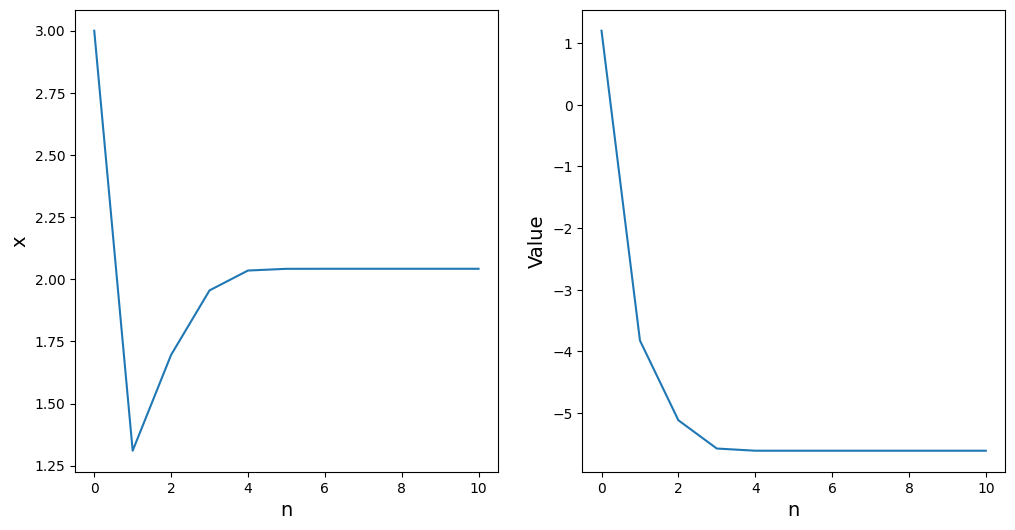

In [21]:
# Choose an initial value for x
x_init = 3

# Choose the learning rate
gam = 0.1

# Choose the number of iterations
N = 10

# Save the values for x and function value
X = [x_init]

# Save the function value at x_init
FUN_VAL = [my_fun(x_init)]

for n in range(N):
    
    # call the grad_descent_step
    x_new = grad_descent_step(X[-1], gam)
    
    # save the obtained value x_new in the list X (use append method)
    # save the function value at point x_new (use append method)
    X.append(x_new)
    FUN_VAL.append(my_fun(x_new))

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(range(N+1), X)
ax[0].set_xlabel('n', size=14)
ax[0].set_ylabel('x', size=14)

ax[1].plot(range(N+1), FUN_VAL)
ax[1].set_xlabel('n', size=14)
ax[1].set_ylabel('Value', size=14)

plt.show()

**The optimal value for x**:

In [28]:
# Define the optimal value for x
x_opt = 3

print("The optimal value of x is:", x_opt)

The optimal value of x is: 3


**The minimum value of the function**:

In [25]:
# Define the minimum value of the function at optimal point x_opt
min_val = 0

print("The minimum value of f is:", min_val)

The minimum value of f is: 0


## Check the Result

Eventually, to ensure that you have implemented the Gradient Descent algorithm correctly, you can obtain the minimum value of the function using Python's capabilities.

You can check the Gradient Descent algorithm output by comparing the results obtained by the 'fmin' function from SciPy as follows:

In [26]:
from scipy.optimize import fmin

minimum = fmin(my_fun, 3)

Optimization terminated successfully.
         Current function value: -5.608514
         Iterations: 16
         Function evaluations: 32


In [27]:
print("The optimal value for x is:", minimum[0])

The optimal value for x is: 2.0421386718749974


## Tasks to Perform:

- Evaluate the impact of the learning rate on the convergence rate of the Gradient Descent algorithm towards the optimal solution.


In order to showcase the impact of the learning rate on the convergence rate I wrote a codeblock to run the algorithm for each different learning rate. The learning_rates list contains different learning rates to compare. The outer loop iterates over these learning rates, and for each learning rate, the inner loop runs the gradient descent algorithm for a fixed number of iterations (N) and stores the function values at each iteration. The final plot shows how the value changes over iterations for each learning rate. Then, I wrote another codeblock to showcase hot the optimal solutions change.

The optimal values for the different learning rates are:
 Learning rate = 0.01 
 2.0421542733452553 
Learning rate = 0.001 
 2.042143375477344 
Learning rate = 0.02 
 2.0421368658390144


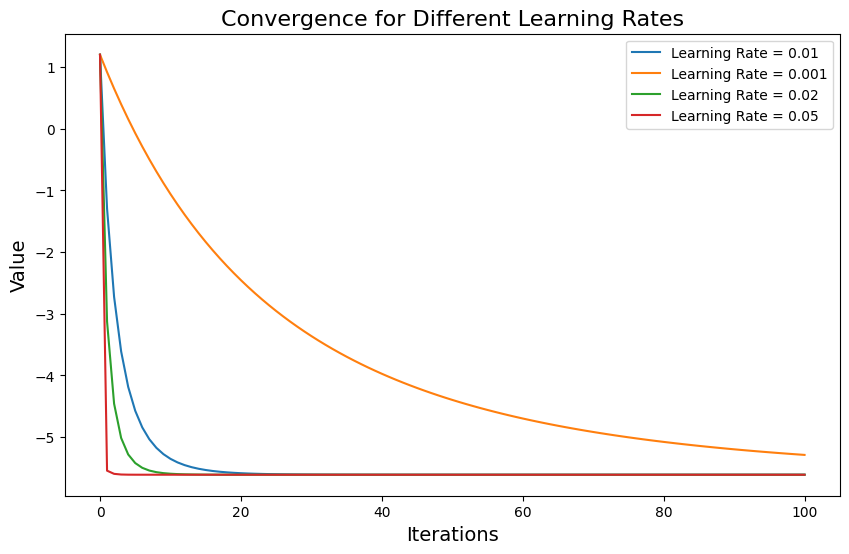

In [48]:
# Define the functions and gradient
def my_fun(x):
    return 0.3 * (x**4) - 0.1*(x**3) - 2*(x**2) - 0.8*x

def grad_fun(x):
    return 1.2*(x**3) - 0.3*(x**2) - 4*x - 0.8

def grad_descent_step(x, alf):
    return x - alf * grad_fun(x)

# Choose an initial value for x
x_init = 3

# Choose a range of learning rates
learning_rates = [0.01, 0.001, 0.02, 0.05]

# Choose the number of iterations
N = 100

# Store optimal values for each learning rate
optimal_values = []

# Plot the results for each learning rate
fig, ax = plt.subplots(figsize=(10, 6))

for gam in learning_rates:
    X = [x_init]
    FUN_VAL = [my_fun(x_init)]
    
    for n in range(N):
        x_new = grad_descent_step(X[-1], gam)
        
        X.append(x_new)
        FUN_VAL.append(my_fun(x_new))
    
    ax.plot(range(N+1), FUN_VAL, label=f'Learning Rate = {gam}')

for gam in learning_rates:
    
    # Run gradient descent for N iterations
    for n in range(N):
        x_init = grad_descent_step(x_init, gam)
    
    # Store the final optimal value
    optimal_values.append(x_init)

# Results
print('The optimal values for the different learning rates are:\n', 
      'Learning rate =',learning_rates[0],'\n', optimal_values[0],
      '\nLearning rate =',learning_rates[1],'\n', optimal_values[1],
      '\nLearning rate =',learning_rates[2],'\n', optimal_values[2])

ax.set_xlabel('Iterations', size=14)
ax.set_ylabel('Value', size=14)
ax.legend()
plt.title('Convergence for Different Learning Rates', size=16)
plt.show()

A learning rate of 0.01 results in a reasonable rate of convergence, balancing rapid advancement with avoiding oscillations. The slower convergence is shown with the lower learning rates of 0.001 and 0.02; 0.02 causes oscillations, while 0.001 is too conservative. The increased learning rate of 0.05 shows faster convergence at first, but overshooting causes it to finally diverge. This highlights the critical trade-off in finding the ideal balance for effective and stable convergence .

- Demonstrate that, depending on the initial guess for the optimal solution, the Gradient Descent algorithm may result in different optimal solutions (different local minima).

Here I used the same logic as for the first task. I demonstrated visually the difference in optimal solution results depending on a list of random initial guesses.

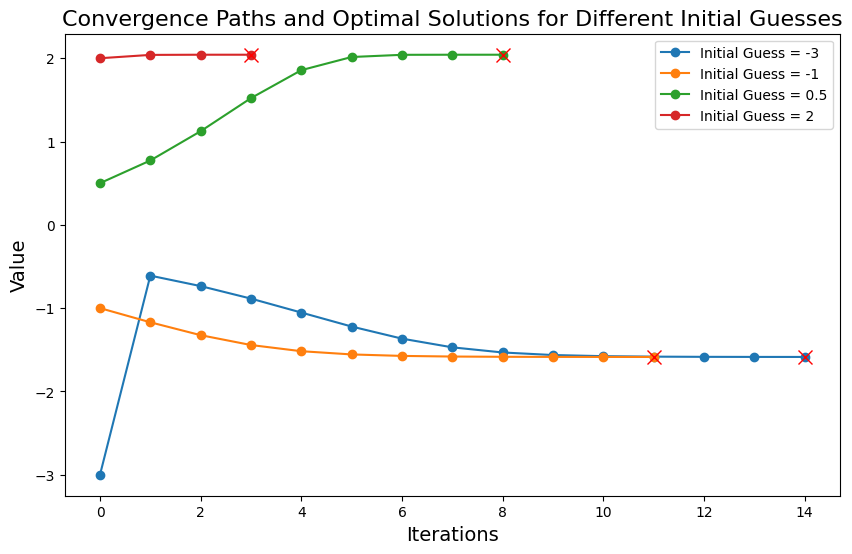

In [53]:
# Define the functions and gradient
def my_fun(x):
    return 0.3 * (x**4) - 0.1*(x**3) - 2*(x**2) - 0.8*x

def grad_fun(x):
    return 1.2*(x**3) - 0.3*(x**2) - 4*x - 0.8

def grad_descent_step(x, alf):
    return x - alf * grad_fun(x)

# Choose a range of initial guesses
initial_guesses = [-3, -1, 0.5, 2]

# Choose a learning rate
learning_rate = 0.1

# Choose the convergence criteria
convergence_threshold = 1e-6

# Plot the results for each initial guess
fig, ax = plt.subplots(figsize=(10, 6))

for x_init in initial_guesses:
    x_values = [x_init]
    
    # Run gradient descent until convergence
    while True:
        x_new = grad_descent_step(x_values[-1], learning_rate)
        x_values.append(x_new)
        
        # Check convergence criteria
        if np.abs(my_fun(x_new) - my_fun(x_values[-2])) < convergence_threshold:
            break

    # Plot the convergence path
    ax.plot(range(len(x_values)), x_values, marker='o', label=f'Initial Guess = {x_init}')
    
    # Mark the optimal solution
    ax.plot(len(x_values) - 1, x_new, marker='x', markersize=10, color='red')

ax.set_xlabel('Iterations', size=14)
ax.set_ylabel('Value', size=14)
ax.legend()
plt.title('Convergence Paths and Optimal Solutions for Different Initial Guesses', size=16)
plt.show()

## Assignment 2

Implement Gradient Descent Algorithm for House Price Prediction

The goal in this assignment is to build a linear regression model to predict the house price based on its size.

In [3]:
# Import numpy, pandas, and matplotlib.pyplot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('house-prices.csv')

# Take a look at the data, use head method for data
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


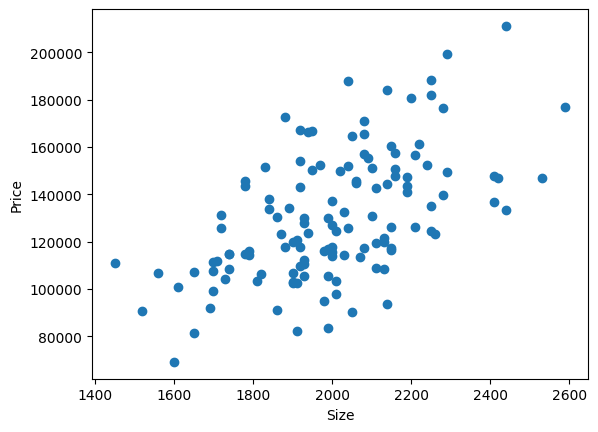

In [4]:
# Select the size and price values from the dataset and assign them to 
# variables X and Y
X_dat = data['SqFt'].to_numpy()
Y_dat = data['Price'].to_numpy()

# Plot a scatter plot for X_dat and Y_dat
# Take alook at our data
plt.scatter(X_dat, Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

It is always good practice to normalize our data to increase the convergence rate of the Gradient Descent algorithm.

In [5]:
# Normalize our data
X = (np.max(X_dat) - X_dat)/(np.max(X_dat) - np.min(X_dat)) 
Y = (np.max(Y_dat) - Y_dat)/(np.max(Y_dat) - np.min(Y_dat)) 

Now that our data is prepared, let's start creating the necessary functions to implement the Gradient Descent algorithm.


### Linear Regression Model
At first step, we need to define our linear regression model. The model is as follows:

$$y=wx+b$$

In [30]:
from sklearn.linear_model import LinearRegression
# Define the linear regression model
def LR_model(x, w, b):
    # x: a scalar value, the size of the house
    # w: the weight of the model, a scalar value
    # b: the intercept of the model, a scalar value
    
    
    # Define the linear regression model
    y = w*x + b
    
    return y

### Cost Function

Now, we need to define the cost function. The cost function is a mean squared error function. 

The mean squared error cost function for our linear regression can be formulated as:

$$J(w,b)=\dfrac{1}{2m} \sum_{i=1}^{m} {\left(\hat y^{(i)} - y^{(i)}\right)^2}= \dfrac{1}{2m} \sum_{i=1}^{m} {\left(wx+b - y^{(i)}\right)^2}$$



In [47]:
# Implement the cost function (mean squared error function)
def cost(X, Y, w, b):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    
    # Number of the observations
    m = len(X)
    
    # Cost value
    
    # Initilize the sum as zero 
    J = 0
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Put your code here (1 line of code)
        # Use LR_model to compute the prediction of the price based on the size
        y_pred = LR_model(x, w, b)
        
        # Compute the cost function (mean squared error cost function)
        J += (1/(2*m))*np.sum((y_pred - y)**2)
    
    return J
    

To make sure that you have correctly implemented the cost function, run the following cell and compare the obtained result with the given value. 

In [49]:
# Use your function to compute the cost for the following values
cost(X, Y, 2, 3)

6.050766241298438

The expected value is: 6.050766241298438


### Gradient Descent Update Rule

Now you need to implement the Gradient Descent update rule as follows:

$$ \qquad \left\{ \begin{array}{l} w_{n+1} = w_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)x^{(i)} \\ b_{n+1} = b_{n} -  \dfrac{\alpha}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) \end{array} \right.$$


Here, $\alpha$ is the learning rate, $m$ is the number of the observations. Note that you are able to compute $\hat{y}^{(i)}$ using your previously developed function **LR_model**.

In [50]:
def grad_descent_step(X, Y, w, b, alf):
    # X: a vector contains the size of the houses
    # Y: a vector contains the price of the houses
    # w: weight of the linear regression model
    # b: intercept of the model
    # alf: learning rate (a scalar value)
    
    # Number of the observations
    m = len(X)
    
    # Initilize both sum_w and sum_b as zero
    sum_w = 0
    sum_b = 0
    
    # A for loop to compute the sums appear in the update rule
    for i in range(m):
        x = X[i]
        y = Y[i]
        
        # Use your LR_model to compute a prediction with x, w, b
        y_pred = LR_model(x,w,b)
        
        # Put your code here (2 lines of code)
        # Compute the sums appear in the update rule
        sum_w += w - (alf/m)* np.sum(y_pred - y) * x
        sum_b += b - (alf/m)* np.sum(y_pred - y)
    
    # Put your codes here (2 lines of code)
    # Implement the update rule for the gradien descent
    w_new = sum_w
    b_new = sum_b 
    
    return w_new, b_new

Now that you have implemented the Gradient Descent update rule, to ensure its correctness, run the following cell and compare your result with the provided one.

In [51]:
grad_descent_step(X, Y, 2, -3, 0.01)

(256.01260782374413, -383.9746502175622)

The expected values are as follows:
    
(2.0126078237441893, -2.97465021756207)

### Implement Gradient Descent Algorithm

Now, it is time to implement the Gradient Descent algorithm using your already developed functions.

In [ ]:
# Choose an initial value for w
w_init = 3

# Choose an initial value for b
b_init = 7

# Choose the learning rate
alf = 0.1

# Choose the number of iterations
N = 15

# Save the values for w, b
W = np.zeros(N + 1)
B = np.zeros(N + 1)
C = np.zeros(N + 1)

# Save initial values
W[0] = w_init
B[0] = b_init

# Put your code here (1 line of code)
# Save the cost for w_init and b_init using cost function
C[0] = cost(X, Y, W, B)

# A loop to iteratively apply the update rule 
for n in range(N):
    
    # Put your code here (1 line of code)
    # Use grad_descent_step function to find new values for w, b
    w_new, b_new = None
    
    # Put your code here (2 lines of code)
    # Save the new values for w and b 
    W[n+1] = None
    B[n+1] = None
    
    # Put your code here (1 line of code)
    # Save the cost value for compute new values of w and b 
    # Use the cost function you have already implemented
    C[n+1] = None

# Plot the results
plt.plot(range(N+1),C)
plt.show()

Now, plot the obtained results:

In [ ]:
# Put your code here (1 line of code)
# Plot the saved values of W against the iteration.
None

plt.show()

In [ ]:
# Put your code here (1 line of code)
# Plot the saved values of B against the iteration.
None

plt.show()

In [ ]:
# Put your code here (2 lines of code)
# Define the final values (optimal values) of w and b
w_opt = None
b_opt = None

print("The optimal value for w:", w_opt)
print("The optimal value for b:", b_opt)

Since we initially normalized the data, in this section, we inverse the normalization to represent the model using the initial values of the data.

In [ ]:
X_max = np.max(X_dat)
X_min = np.min(X_dat)

Y_max = np.max(Y_dat)
Y_min = np.min(Y_dat)

X_line = np.linspace(X_min, X_max, 100)
Y_line_norm = w_opt * (X_max - X_line)/(X_max - X_min) + b_opt
Y_line = Y_max - Y_line_norm * (Y_max - Y_min) 
plt.plot(X_line,Y_line, 'r--')


plt.scatter(X_dat,Y_dat)

plt.xlabel('Size')
plt.ylabel('Price')
plt.show() 

### Compare with Scikit-learn

Congratulations! You have finished building a linear regression model from scratch. Perhaps you are curious to compare your model with the one obtained using the Scikit-learn package. In what follows, you will train the same model using Scikit-learn, and you can compare your model with that one.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1,1), Y)

In [ ]:
print("The optimal value for w:", reg.coef_)

In [ ]:
print("The optimal value for b:", reg.intercept_)

If your model is significantly different from that of Scikit-learn, try to fine-tune the hyperparameters in your algorithm, such as the learning rate and the number of iterations. You should aim to achieve similar results.

### Tasks:

Create a plot illustrating the original data points and the learned regression line.

Evaluate the impact of learning rate on the obtained values for _w_ and _b_. Does the algorithm consistently converge to the same solution, regardless of the initial values for _w_ and _b_ ?

Determine the best learning rate value for training the model. Explain why you consider that value the best.
plot iterations against mse

Illustrate the value of the cost function versus the algorithm's iterations.